<a href="https://colab.research.google.com/github/sneha-4515/Data_science_projects/blob/main/zee_recommender/Zee_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Statement and Formatting the Data

Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

Importing Header

In [ ]:
import pandas as pd
import numpy as np

Loading dataset

In [ ]:
! gdown 1GzieFz-Np5gLLjfXnt8_RWZdj8kmM_Rl
! gdown 1SEKkDdBDBpCnPxogaF03zOYqy8kSamEA
! gdown 1Y0F8wYknzc9nEuhO-UGhBhhhf-XvL7YR

Downloading...
From: https://drive.google.com/uc?id=1GzieFz-Np5gLLjfXnt8_RWZdj8kmM_Rl
To: /content/zee-movies.dat
100% 171k/171k [00:00<00:00, 61.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SEKkDdBDBpCnPxogaF03zOYqy8kSamEA
To: /content/zee-ratings.dat
100% 24.6M/24.6M [00:00<00:00, 73.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Y0F8wYknzc9nEuhO-UGhBhhhf-XvL7YR
To: /content/zee-users.dat
100% 134k/134k [00:00<00:00, 34.6MB/s]


# Formatting the data files to bring them into a workable format

In [ ]:
ratings = pd.read_csv("zee-ratings.dat", sep="::", engine="python",
                      names=["UserID","MovieID","Rating","Timestamp"])
users = pd.read_csv("zee-users.dat", sep="::", engine="python",
                    names=["UserID","Gender","Age","Occupation","Zip-code"])
movies = pd.read_csv("zee-movies.dat", sep="::", engine="python",
                     names=["MovieID","Title","Genres"], encoding='ISO-8859-1')

# Merging the data files and creating a single consolidated dataframe

In [ ]:
merged_df = pd.merge(ratings, users, on='UserID', how='left')
merged_df = pd.merge(merged_df, movies, on='MovieID', how='left')

In [ ]:
print(merged_df.shape)
merged_df.head()

(1000210, 10)


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,NaN,NaN
1,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
2,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
3,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
4,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama


In [ ]:
merged_df = merged_df.drop(index=0).reset_index(drop=True)

# 2. Performing EDA, Data Cleaning, and Feature Engineering

1.	Reviewing the shape and structure of the dataset

In [ ]:
merged_df.shape

(1000209, 10)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  object
 1   MovieID     1000209 non-null  object
 2   Rating      1000209 non-null  object
 3   Timestamp   1000209 non-null  object
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  object
 6   Occupation  1000209 non-null  object
 7   Zip-code    1000209 non-null  object
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: object(10)
memory usage: 76.3+ MB


Checking Null

In [ ]:
merged_df.isna().sum()

,0
UserID,0
MovieID,0
Rating,0
Timestamp,0
Gender,0
Age,0
Occupation,0
Zip-code,0
Title,0
Genres,0


Performing necessary type conversion and deriving new features

In [ ]:
# Convert Age to integer
merged_df['Age'] = merged_df['Age'].astype(int)

In [ ]:
# Create age group mapping
age_map = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

# Map numeric ages to group labels
merged_df['Age_Group'] = merged_df['Age'].map(age_map)

# Count number of ratings per age group
age_group_stats = merged_df.groupby('Age_Group')['Rating'].count().reset_index()
age_group_stats.columns = ['Age_Group', 'Num_Ratings']

# Sort descending to find top age group
age_group_stats = age_group_stats.sort_values('Num_Ratings', ascending=False)
print(age_group_stats)

  Age_Group  Num_Ratings
1     25-34       395556
2     35-44       199003
0     18-24       183536
3     45-49        83633
4     50-55        72490
5       56+        38780
6  Under 18        27211


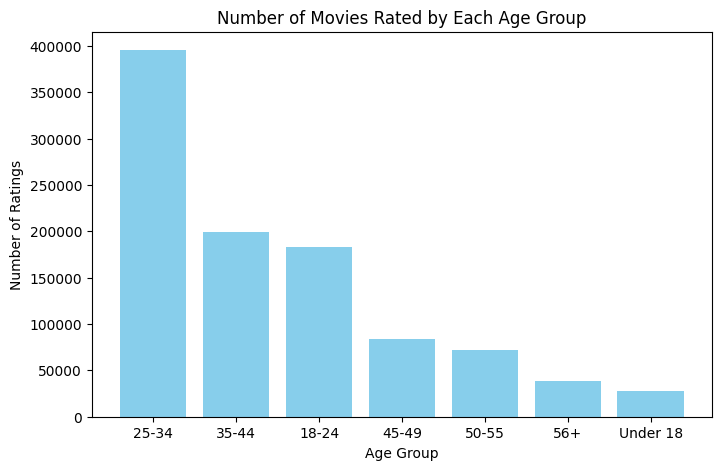

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(age_group_stats['Age_Group'], age_group_stats['Num_Ratings'], color='skyblue')
plt.title('Number of Movies Rated by Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Ratings')
plt.show()

Age group that rated most movies are (25-34) based on the observation from above plot

In [ ]:
merged_df['Occupation'] = merged_df['Occupation'].astype(int)
occupation_map = {
    0: "other",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

# Map numeric occupation codes to names
merged_df['Profession'] = merged_df['Occupation'].map(occupation_map)

In [ ]:
profession_stats = merged_df.groupby('Profession')['Rating'].count().reset_index()
profession_stats.columns = ['Profession', 'Num_Ratings']
profession_stats = profession_stats.sort_values('Num_Ratings', ascending=False)
print(profession_stats)

              Profession  Num_Ratings
4   college/grad student       131032
11                 other       130499
7   executive/managerial       105425
1      academic/educator        85351
17   technician/engineer        72816
20                writer        60397
12            programmer        57214
2                 artist        50068
14       sales/marketing        49109
16         self-employed        46021
6     doctor/health care        37205
3         clerical/admin        31623
0           K-12 student        23290
15             scientist        22951
5       customer service        21850
10                lawyer        20563
19            unemployed        14904
13               retired        13754
18   tradesman/craftsman        12086
9              homemaker        11345
8                 farmer         2706


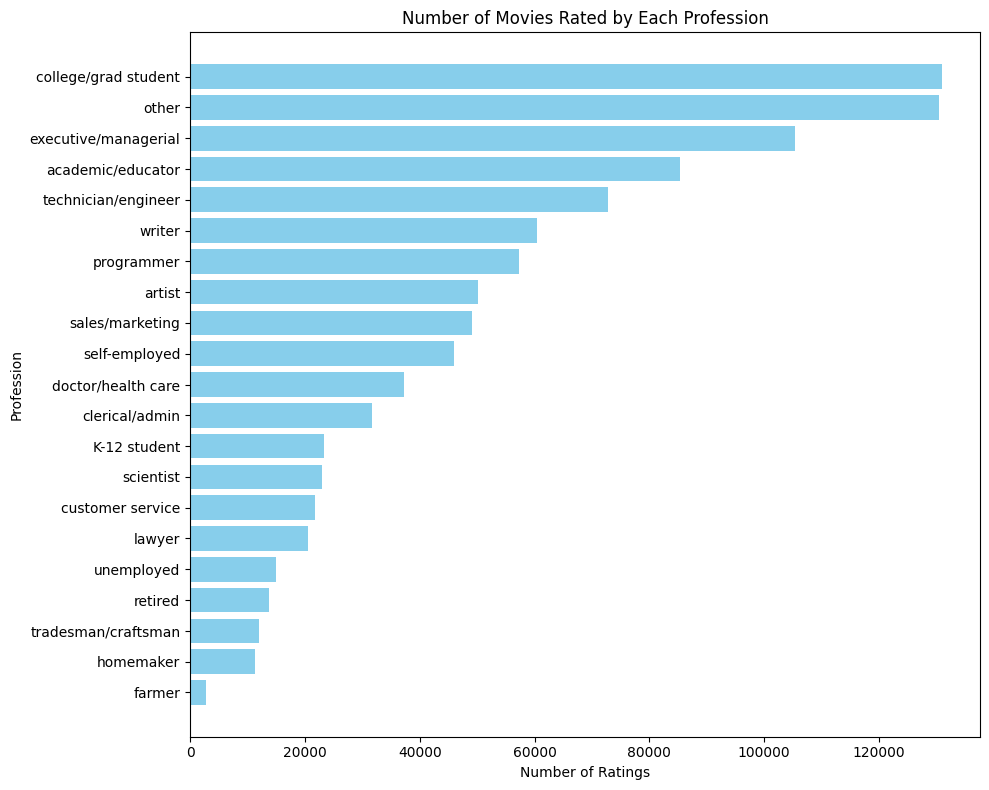

In [ ]:
import matplotlib.pyplot as plt

# Clean data
merged_df['Profession'] = merged_df['Occupation'].map(occupation_map)
merged_df['Profession'] = merged_df['Profession'].fillna('Unknown')

profession_stats = (
    merged_df.groupby('Profession')['Rating'].count().reset_index()
    .rename(columns={'Rating':'Num_Ratings'})
    .sort_values('Num_Ratings', ascending=True)
)

# Horizontal bar chart
plt.figure(figsize=(10,8))
plt.barh(profession_stats['Profession'], profession_stats['Num_Ratings'], color='skyblue')
plt.title('Number of Movies Rated by Each Profession')
plt.xlabel('Number of Ratings')
plt.ylabel('Profession')
plt.tight_layout()
plt.show()


Observation: College/grad student rated 131032 movies that is highest amongst all occupation

In [ ]:
print(merged_df['Gender'].value_counts())

Gender
M    753769
F    246440
Name: count, dtype: int64


Ratings provided by males in the dataset is higher in comparison with females

In [ ]:
decade_stats = merged_df.drop_duplicates('Title').groupby('Decade')['Title'].count().reset_index()
decade_stats.columns = ['Decade', 'Num_Movies']
decade_stats = decade_stats.sort_values('Num_Movies', ascending=False)
print(decade_stats)

   Decade  Num_Movies
8  1990.0        2152
7  1980.0         592
6  1970.0         240
5  1960.0         187
4  1950.0         165
9  2000.0         152
3  1940.0         120
2  1930.0          72
1  1920.0          23
0  1910.0           3


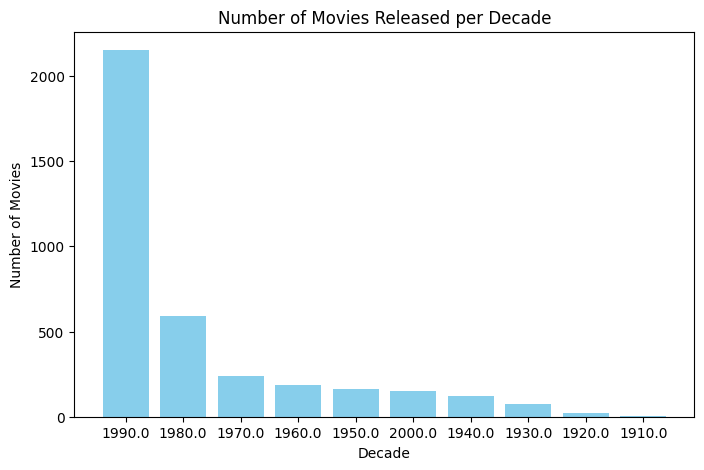

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(decade_stats['Decade'].astype(str), decade_stats['Num_Movies'], color='skyblue')
plt.title('Number of Movies Released per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.show()

Most of the movies present in our dataset were released in 1990

In [ ]:
# Count number of ratings per movie
movie_rating_counts = merged_df.groupby('Title')['Rating'].count().reset_index()

# Rename for clarity
movie_rating_counts.columns = ['Title', 'Num_Ratings']

# Sort to get the top one
top_movie = movie_rating_counts.sort_values('Num_Ratings', ascending=False).head(1)

print(top_movie)

                      Title  Num_Ratings
127  American Beauty (1999)         3428


The movie with maximum no. of ratings i.e 3428 is American Beauty(1999)

In [ ]:
merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'], unit='s')
# Extract release year from movie title

/tmp/ipython-input-2528871160.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'], unit='s')


In [ ]:
merged_df['Year'] = merged_df['Title'].str.extract(r'\((\d{4})\)').astype(float)
merged_df['Decade'] = (merged_df['Year'] // 10) * 10

In [ ]:
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Age_Group,Profession,Year,Decade
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18,K-12 student,1975.0,1970.0
1,1,661,3,2000-12-31 22:35:09,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,Under 18,K-12 student,1996.0,1990.0
2,1,914,3,2000-12-31 22:32:48,F,1,10,48067,My Fair Lady (1964),Musical|Romance,Under 18,K-12 student,1964.0,1960.0
3,1,3408,4,2000-12-31 22:04:35,F,1,10,48067,Erin Brockovich (2000),Drama,Under 18,K-12 student,2000.0,2000.0
4,1,2355,5,2001-01-06 23:38:11,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,Under 18,K-12 student,1998.0,1990.0


In [ ]:
# Derive decade
#print(users.groupby('Gender').size())
#print(movies['Decade'].value_counts().head())

Group the data according to the average rating and no. of **ratings**

In [ ]:
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')
movie_stats = merged_df.groupby('Title', as_index=False)['Rating'].agg(Avg_Rating='mean', Num_Ratings='count')
print(movie_stats.sort_values('Num_Ratings', ascending=False).head())


                                                  Title  Avg_Rating  \
127                              American Beauty (1999)    4.317386   
3153          Star Wars: Episode IV - A New Hope (1977)    4.453694   
3154  Star Wars: Episode V - The Empire Strikes Back...    4.292977   
3155  Star Wars: Episode VI - Return of the Jedi (1983)    4.022893   
1789                               Jurassic Park (1993)    3.763847   

      Num_Ratings  
127          3428  
3153         2991  
3154         2990  
3155         2883  
1789         2672  


# Recommender System based on Pearson Correlation

Pivot table of movie titles & user id and imputing the NaN values

In [ ]:
# Create pivot table
pivot = merged_df.pivot_table(index='UserID', columns='Title', values='Rating')
pivot


Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivot_filled = pivot.fillna(0)

Item-based approach to create a simple recommender system that uses Pearson Correlation


In [ ]:
import pandas as pd

def pearson_recommend(movie_name, pivot, min_common=50, top_n=5):
    # 1️⃣ Ratings for the target movie
    target = pivot[movie_name]

    # 2️⃣ Store correlation and common user count for each movie
    results = []

    for other_movie in pivot.columns:
        if other_movie == movie_name:
            continue  # skip the same movie

        other = pivot[other_movie]

        # Users who rated both movies
        common_users = target.notna() & other.notna()
        num_common = common_users.sum()

        # Only calculate correlation if enough users overlap
        if num_common >= min_common:
            corr_value = target[common_users].corr(other[common_users])
            if pd.notna(corr_value):  # ignore invalid correlations
                results.append({
                    'Movie': other_movie,
                    'Correlation': corr_value,
                    'Common_Users': num_common
                })

    # 3️⃣ Convert list to DataFrame
    corr_df = pd.DataFrame(results)

    # 4️⃣ Sort by correlation (descending)
    corr_df = corr_df.sort_values(by='Correlation', ascending=False).head(top_n)

    return corr_df
movie_recomm=input("enter name of movie")
pearson_recommend(movie_recomm, pivot,min_common=30, top_n=5)

enter name of movieLiar Liar (1997)


,Movie,Correlation,Common_Users
1655,"Scarlet Letter, The (1995)",0.608716,33
1078,Life (1999),0.576081,60
1379,Oliver & Company (1988),0.550504,53
714,Frenzy (1972),0.538066,36
1004,Jules and Jim (Jules et Jim) (1961),0.537842,31


Obs: Most correlated movie to example Liar Liar is Scarlet letter,The(1995) according to the pearson correlation.

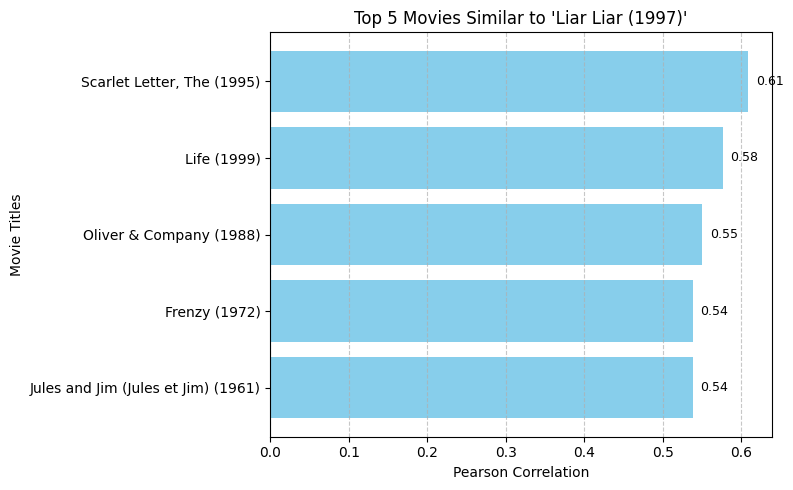

In [ ]:
import matplotlib.pyplot as plt

# Get top 5 similar movies for the target movie
movie_name = 'Liar Liar (1997)'
recommendations = pearson_recommend(movie_name, pivot, min_common=30, top_n=5)

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(recommendations['Movie'], recommendations['Correlation'], color='skyblue')
plt.gca().invert_yaxis()  # highest correlation at top

# Add chart titles and labels
plt.title(f"Top {len(recommendations)} Movies Similar to '{movie_name}'", fontsize=12)
plt.xlabel('Pearson Correlation', fontsize=10)
plt.ylabel('Movie Titles', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate correlation values on bars
for i, v in enumerate(recommendations['Correlation']):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

## Recommender System based on Cosine Similarity

User similarity matrix and item similarity matrix

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# User similarity matrix
user_similarity = cosine_similarity(pivot_filled)
user_similarity_df = pd.DataFrame(user_similarity,
                                  index=pivot_filled.index,
                                  columns=pivot_filled.index)

# Item similarity matrix
item_similarity = cosine_similarity(pivot_filled.T)
item_similarity_df = pd.DataFrame(item_similarity,
                                  index=pivot_filled.columns,
                                  columns=pivot_filled.columns)

print("🎯 User Similarity Matrix:")
print(user_similarity_df.head())

🎯 User Similarity Matrix:
UserID         1        10       100      1000      1001      1002      1003  \
UserID                                                                         
1       1.000000  0.255288  0.123967  0.207800  0.139061  0.110320  0.121384   
10      0.255288  1.000000  0.258047  0.278753  0.154858  0.112222  0.141111   
100     0.123967  0.258047  1.000000  0.297539  0.075597  0.110450  0.358686   
1000    0.207800  0.278753  0.297539  1.000000  0.094710  0.047677  0.201722   
1001    0.139061  0.154858  0.075597  0.094710  1.000000  0.164551  0.053788   

UserID      1004      1005      1006  ...       990       991       992  \
UserID                                ...                                 
1       0.179143  0.103137  0.052816  ...  0.079367  0.038048  0.032136   
10      0.428224  0.188569  0.101856  ...  0.153462  0.186086  0.083224   
100     0.236065  0.171609  0.099147  ...  0.098235  0.097953  0.065152   
1000    0.353782  0.323584  0.130702  

In [ ]:
print("\n🎬 Item Similarity Matrix:")
print(item_similarity_df.head())


🎬 Item Similarity Matrix:
Title                          $1,000,000 Duck (1971)  'Night Mother (1986)  \
Title                                                                         
$1,000,000 Duck (1971)                       1.000000              0.072357   
'Night Mother (1986)                         0.072357              1.000000   
'Til There Was You (1997)                    0.037011              0.115290   
'burbs, The (1989)                           0.079291              0.115545   
...And Justice for All (1979)                0.060838              0.159526   

Title                          'Til There Was You (1997)  'burbs, The (1989)  \
Title                                                                          
$1,000,000 Duck (1971)                          0.037011            0.079291   
'Night Mother (1986)                            0.115290            0.115545   
'Til There Was You (1997)                       1.000000            0.098756   
'burbs, The (1989) 

Item-Based Collaborative Filtering (KNN + Cosine)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Transpose → rows = movies, columns = users
movie_user_matrix = csr_matrix(pivot_filled.T.values)

# Fit the model
knn_item = NearestNeighbors(metric='cosine', algorithm='brute')
knn_item.fit(movie_user_matrix)

# Function to recommend similar movies
def knn_item_recommend(movie_name, pivot_filled, model, n_neighbors=6):
    movie_list = list(pivot_filled.columns)
    idx = movie_list.index(movie_name)
    distances, indices = model.kneighbors(pivot_filled.T.iloc[idx].values.reshape(1, -1), n_neighbors)

    print(f"\n🎬 Movies similar to '{movie_name}':")
    for i in range(1, n_neighbors):
        print(f"{movie_list[indices.flatten()[i]]} | Similarity: {1 - distances.flatten()[i]:.2f}")

# Example
knn_item_recommend('Liar Liar (1997)', pivot_filled, knn_item)


🎬 Movies similar to 'Liar Liar (1997)':
Mrs. Doubtfire (1993) | Similarity: 0.56
Ace Ventura: Pet Detective (1994) | Similarity: 0.52
Dumb & Dumber (1994) | Similarity: 0.51
Home Alone (1990) | Similarity: 0.51
Wayne's World (1992) | Similarity: 0.50


The top 3 movies similar to ‘Liar Liar’ on the item-based approach are

Mrs. Doubtfire (1993) | Similarity: 0.56

Ace Ventura: Pet Detective (1994) | Similarity: 0.52

Dumb & Dumber (1994) | Similarity: 0.51


User-Based Collaborative Filtering (KNN + Cosine)

In [ ]:
# Rows = users, columns = movies
user_movie_matrix = csr_matrix(pivot_filled.values)

# Fit the model
knn_user = NearestNeighbors(metric='cosine', algorithm='brute')
knn_user.fit(user_movie_matrix)

# User-based recommender
def knn_user_recommend(user_id, pivot_filled, model, n_neighbors=6, use_position=False):
    user_list = list(pivot_filled.index)

    if use_position:
        idx = user_id
        user_name = user_list[idx]
    else:
        idx = user_list.index(user_id)
        user_name = user_id

    distances, indices = model.kneighbors(pivot_filled.iloc[idx].values.reshape(1, -1), n_neighbors)

    print(f"\n👤 Users similar to User {user_name}:")
    for i in range(1, n_neighbors):
        print(f"User {user_list[indices.flatten()[i]]} | Similarity: {1 - distances.flatten()[i]:.2f}")

    # Recommend movies liked by similar users
    similar_users = indices.flatten()[1:]
    similar_users_ratings = pivot_filled.iloc[similar_users]
    mean_ratings = similar_users_ratings.mean(axis=0)
    user_rated_movies = pivot_filled.iloc[idx] > 0
    recommendations = mean_ratings[~user_rated_movies].sort_values(ascending=False)

    print("\n🎥 Recommended movies for this user:")
    print(recommendations.head(5))

# Example
knn_user_recommend(user_id=0, pivot_filled=pivot_filled, model=knn_user, use_position=True)


👤 Users similar to User 1:
User 5343 | Similarity: 0.41
User 5190 | Similarity: 0.41
User 1481 | Similarity: 0.39
User 1283 | Similarity: 0.39
User 5705 | Similarity: 0.36

🎥 Recommended movies for this user:
Title
Little Mermaid, The (1989)          4.2
Jungle Book, The (1967)             3.4
Silence of the Lambs, The (1991)    3.4
Lady and the Tramp (1955)           2.6
Babe (1995)                         2.4
dtype: float64


# Recommender System based on Matrix Factorization

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Example: use your pivot table (UserID vs Title)
ratings_matrix = pivot.fillna(0)

# Apply Matrix Factorization (SVD)
svd = TruncatedSVD(n_components=20, random_state=42)
matrix_reduced = svd.fit_transform(ratings_matrix)

# Reconstruct the predicted ratings
predicted_ratings = np.dot(matrix_reduced, svd.components_)

# Convert back to DataFrame for easier handling
predicted_df = pd.DataFrame(predicted_ratings, index=ratings_matrix.index, columns=ratings_matrix.columns)

# Example: Evaluate model
rmse = np.sqrt(mean_squared_error(ratings_matrix.values.flatten(), predicted_df.values.flatten()))
mape = mean_absolute_percentage_error(ratings_matrix.values.flatten()+1e-9, predicted_df.values.flatten()+1e-9)

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ MAPE: {mape:.4f}")

✅ RMSE: 0.5967
✅ MAPE: 131744244.5169


In [ ]:
item_embeddings = svd.components_.T  # shape: (num_movies, n_components)
item_embeddings_df = pd.DataFrame(item_embeddings, index=ratings_matrix.columns)
print(item_embeddings_df.head())

                                     0         1         2         3   \
Title                                                                   
$1,000,000 Duck (1971)         0.001395  0.000312  0.000663 -0.005743   
'Night Mother (1986)           0.003033  0.005863 -0.003274 -0.008158   
'Til There Was You (1997)      0.001568 -0.000161 -0.004496 -0.005239   
'burbs, The (1989)             0.010283 -0.008392 -0.002997 -0.023032   
...And Justice for All (1979)  0.007997  0.009296  0.003762 -0.009311   

                                     4         5         6         7   \
Title                                                                   
$1,000,000 Duck (1971)         0.002311 -0.000322 -0.002988  0.002781   
'Night Mother (1986)          -0.005572 -0.002801 -0.002833 -0.005332   
'Til There Was You (1997)     -0.000217  0.000900 -0.003478 -0.001978   
'burbs, The (1989)            -0.000327 -0.016003  0.010786  0.010040   
...And Justice for All (1979) -0.024736  0.000997 

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


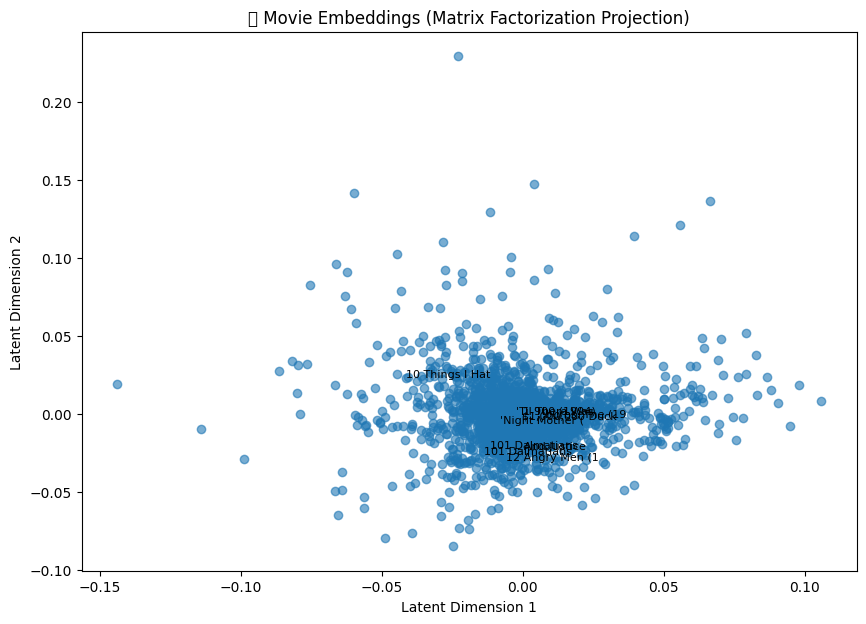

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce embeddings to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(item_embeddings)

# Plot
plt.figure(figsize=(10,7))
plt.scatter(reduced[:,0], reduced[:,1], alpha=0.6)
plt.title("🎬 Movie Embeddings (Matrix Factorization Projection)")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")

# Optionally label a few movies
for i, title in enumerate(ratings_matrix.columns[:10]):
    plt.text(reduced[i,0], reduced[i,1], title[:15], fontsize=8)

plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between items
similarity_matrix = cosine_similarity(item_embeddings)

# Convert to DataFrame for readability
similarity_df = pd.DataFrame(similarity_matrix, index=ratings_matrix.columns, columns=ratings_matrix.columns)
print(similarity_df.head())

Title                          $1,000,000 Duck (1971)  'Night Mother (1986)  \
Title                                                                         
$1,000,000 Duck (1971)                       1.000000              0.340984   
'Night Mother (1986)                         0.340984              1.000000   
'Til There Was You (1997)                    0.112423              0.181035   
'burbs, The (1989)                           0.356877              0.117712   
...And Justice for All (1979)                0.318377              0.470815   

Title                          'Til There Was You (1997)  'burbs, The (1989)  \
Title                                                                          
$1,000,000 Duck (1971)                          0.112423            0.356877   
'Night Mother (1986)                            0.181035            0.117712   
'Til There Was You (1997)                       1.000000            0.195148   
'burbs, The (1989)                            

In [ ]:
def recommend_similar_movies(movie_name, similarity_df, top_n=5):
    if movie_name not in similarity_df.columns:
        return "Movie not found in database."
    similar_scores = similarity_df[movie_name].sort_values(ascending=False)[1:top_n+1]
    return similar_scores

# Example
recommendations = recommend_similar_movies('Liar Liar (1997)', similarity_df)
print("🎥 Movies similar to 'Liar Liar (1997)':")
print(recommendations)

🎥 Movies similar to 'Liar Liar (1997)':
Title
Ace Ventura: Pet Detective (1994)    0.953466
Dumb & Dumber (1994)                 0.945075
Cool Runnings (1993)                 0.935925
Analyze This (1999)                  0.934730
Mrs. Doubtfire (1993)                0.928075
Name: Liar Liar (1997), dtype: float64


Q1 to Q6 answered in case study

Q7.	On the basis of approach, Collaborative Filtering methods can be classified into ---user---based and ---item---based.

Q8.	Pearson Correlation ranges between -1 to 1 whereas, Cosine Similarity belongs to the interval between 0 to 1.

Q9.	Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.
✅ RMSE: 0.5967
✅ MAPE: 131744244.5169


# Q10.Give the sparse ‘row’ matrix representation for the following dense matrix -
[[1 0]
[3 7]]


In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

dense = np.array([[1, 0],
                  [3, 7]])

In [ ]:
sparse = csr_matrix(dense)
print(sparse)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (2, 2)>
  Coords	Values
  (0, 0)	1
  (1, 0)	3
  (1, 1)	7
